In [1]:
import torch
import matplotlib.pyplot as plt 
import cv2
from diffusion import Diffusion
from torchvision import transforms
from module import UNet
from module import Down

d:\Anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


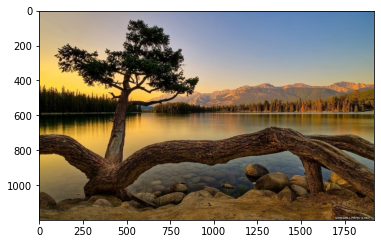

In [2]:
img=cv2.imread('image\wp2599594.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [3]:
data_transforms=[transforms.ToTensor()]
data_transform=transforms.Compose(data_transforms)
transformed_img=data_transform(img)

In [4]:
diffusion=Diffusion()
noise_image,noise=diffusion.noise_image(transformed_img,100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


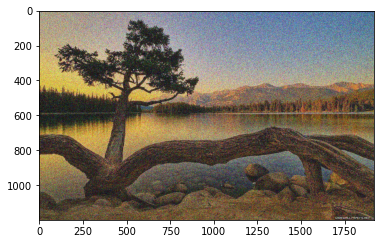

In [5]:
noise_image_ar=noise_image.permute(1,2,0).numpy()
plt.imshow(noise_image_ar)

In [6]:
net=UNet()
x = torch.randn(3, 3, 64, 64)
t = x.new_tensor([500] * x.shape[0])
print(net(x,t).shape)

torch.Size([3, 3, 64, 64])


In [7]:
x=torch.randn(3,3,256,256)
t = x.new_tensor([10] * x.shape[0])
down=Down(in_channels=3,out_channels=64)
print(down(x,t).shape)

RuntimeError: size mismatch, got 64, 64x256,3